# Import Libraries 

In [1]:
pip install -U scikit-learn xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [4]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head(10)

df = df.drop(columns = ["Product ID"])

In [95]:
df_recommend = pd.read_csv('df_features.csv')
df_recommend.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [5]:
# Show the segmented DataFrame
print(df.head())

   User ID Product Name   Brand         Category  Price    Rating   Color Size
0       19        Dress  Adidas    Men's Fashion     40  1.043159   Black   XL
1       97        Shoes     H&M  Women's Fashion     82  4.026416   Black    L
2       25        Dress  Adidas  Women's Fashion     44  3.337938  Yellow   XL
3       57        Shoes    Zara    Men's Fashion     23  1.049523   White    S
4       79      T-shirt  Adidas    Men's Fashion     79  4.302773   Black    M


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product Name  1000 non-null   object 
 2   Brand         1000 non-null   object 
 3   Category      1000 non-null   object 
 4   Price         1000 non-null   int64  
 5   Rating        1000 non-null   float64
 6   Color         1000 non-null   object 
 7   Size          1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [8]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Example dataset with multiple categorical features and a target variable 'Rating'

# Create DataFrame
df_full = pd.DataFrame(df)

# Features and target
X = df_full[['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID']]
y = df_full['Rating']

# Initialize CatBoostEncoder
encoder = ce.CatBoostEncoder(cols=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'])

# Fit and transform the training data
X_encoded = encoder.fit_transform(X, y)

# Rename the new encoded columns
X_encoded.columns = ['Product Name_encoded', 'Brand_encoded', 'Category_encoded', 'Color_encoded', 'Size_encoded', 'User ID_encoded']

# Drop the original categorical columns
df_updated = df_full.drop(columns=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'])

# Join the encoded features back to the original DataFrame
df_encoded = pd.concat([df_updated, X_encoded], axis=1)


In [9]:
df_encoded

,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
0,40,1.043159,2.993135,2.993135,2.993135,2.993135,2.993135,2.993135
1,82,4.026416,2.993135,2.993135,2.993135,2.018147,2.993135,2.993135
2,44,3.337938,2.018147,2.018147,3.509776,2.993135,2.018147,2.993135
3,23,1.049523,3.509776,2.993135,2.018147,2.993135,2.993135,2.993135
4,79,4.302773,2.993135,2.458077,1.695272,2.687570,2.993135,2.993135
...,...,...,...,...,...,...,...,...
995,55,1.620081,2.908854,3.003209,3.003089,2.925438,2.953345,2.891994
996,13,1.544464,3.161843,2.884686,3.038584,3.070148,3.006161,3.361617
997,47,3.961913,3.152329,2.996362,2.938688,3.025818,3.000314,2.623336
998,68,3.089722,2.954329,3.001118,2.998847,2.976151,3.025326,3.162969


In [10]:
df_new = pd.DataFrame(df_encoded)
df_new

,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
0,40,1.043159,2.993135,2.993135,2.993135,2.993135,2.993135,2.993135
1,82,4.026416,2.993135,2.993135,2.993135,2.018147,2.993135,2.993135
2,44,3.337938,2.018147,2.018147,3.509776,2.993135,2.018147,2.993135
3,23,1.049523,3.509776,2.993135,2.018147,2.993135,2.993135,2.993135
4,79,4.302773,2.993135,2.458077,1.695272,2.687570,2.993135,2.993135
...,...,...,...,...,...,...,...,...
995,55,1.620081,2.908854,3.003209,3.003089,2.925438,2.953345,2.891994
996,13,1.544464,3.161843,2.884686,3.038584,3.070148,3.006161,3.361617
997,47,3.961913,3.152329,2.996362,2.938688,3.025818,3.000314,2.623336
998,68,3.089722,2.954329,3.001118,2.998847,2.976151,3.025326,3.162969


Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [11]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 8)


In [12]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 1000 non-null   int64  
 1   Rating                1000 non-null   float64
 2   Product Name_encoded  1000 non-null   float64
 3   Brand_encoded         1000 non-null   float64
 4   Category_encoded      1000 non-null   float64
 5   Color_encoded         1000 non-null   float64
 6   Size_encoded          1000 non-null   float64
 7   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


All columns are now numeric.

In [13]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.785000,2.993135,2.966473,2.961967,2.969352,2.965415,2.965117,2.976524
std,26.291748,1.153185,0.217152,0.193344,0.159867,0.141875,0.136690,0.407035
min,10.000000,1.000967,1.983693,2.018147,1.695272,1.799803,1.656591,1.701480
25%,33.000000,1.992786,2.831600,2.854746,2.878439,2.877145,2.929529,2.721392
50%,57.000000,2.984003,2.943164,2.930428,3.002708,2.982633,2.982184,2.993135
75%,78.250000,3.985084,3.077073,3.106158,3.056833,3.048068,3.012145,3.228626
max,100.000000,4.987964,3.939873,3.828578,3.815558,3.953299,3.647954,4.266373


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [14]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns='Rating'), 
                                                    df_new.Rating, test_size=0.3, 
                                                    random_state=47)

In [16]:
X_train.shape, X_test.shape

((700, 7), (300, 7))

In [17]:
y_train.shape, y_test.shape

((700,), (300,))

In [18]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Price                     int64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

In [19]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Price                     int64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

We have only numeric features in our X now!

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 1000 non-null   int64  
 1   Rating                1000 non-null   float64
 2   Product Name_encoded  1000 non-null   float64
 3   Brand_encoded         1000 non-null   float64
 4   Category_encoded      1000 non-null   float64
 5   Color_encoded         1000 non-null   float64
 6   Size_encoded          1000 non-null   float64
 7   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [21]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,Price,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
Price,1.000000,-0.021768,-0.044327,0.052582,0.008400,0.009211,0.013732
Product Name_encoded,-0.021768,1.000000,0.129485,-0.047921,0.087746,0.013802,0.005867
Brand_encoded,-0.044327,0.129485,1.000000,-0.002885,0.145163,-0.011148,-0.014389
Category_encoded,0.052582,-0.047921,-0.002885,1.000000,-0.026674,0.129205,0.017597
Color_encoded,0.008400,0.087746,0.145163,-0.026674,1.000000,-0.085906,-0.017502
Size_encoded,0.009211,0.013802,-0.011148,0.129205,-0.085906,1.000000,-0.048172
User ID_encoded,0.013732,0.005867,-0.014389,0.017597,-0.017502,-0.048172,1.000000


# Method 1 - Random Forest Model

# Define the pipeline

In [22]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [23]:
X_train.head()

,Price,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
128,85,2.669062,3.059661,3.143416,2.926661,3.021098,2.993135
492,88,2.807486,2.844828,2.991981,2.969442,3.011958,2.880183
303,85,2.828699,2.836282,3.119169,3.084120,2.922178,3.099555
120,96,2.629612,3.506794,2.750206,3.018945,2.970156,2.993135
455,14,2.810580,3.213892,2.867895,2.836171,2.886689,2.341233


# Fit and assess performance using cross-validation

In [24]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [25]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.03485995, -0.03482409, -0.05217029, -0.08870481, -0.06231016])

In [26]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.05457385814019995, 0.020046149873532648)

# Hyperparameter search using GridSearchCV

In [27]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [28]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [29]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [30]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 300}

In [31]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.01318844, -0.02416851, -0.03265673, -0.04926689, -0.04701904])

In [32]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.033259922590103706, 0.013648578167567788)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

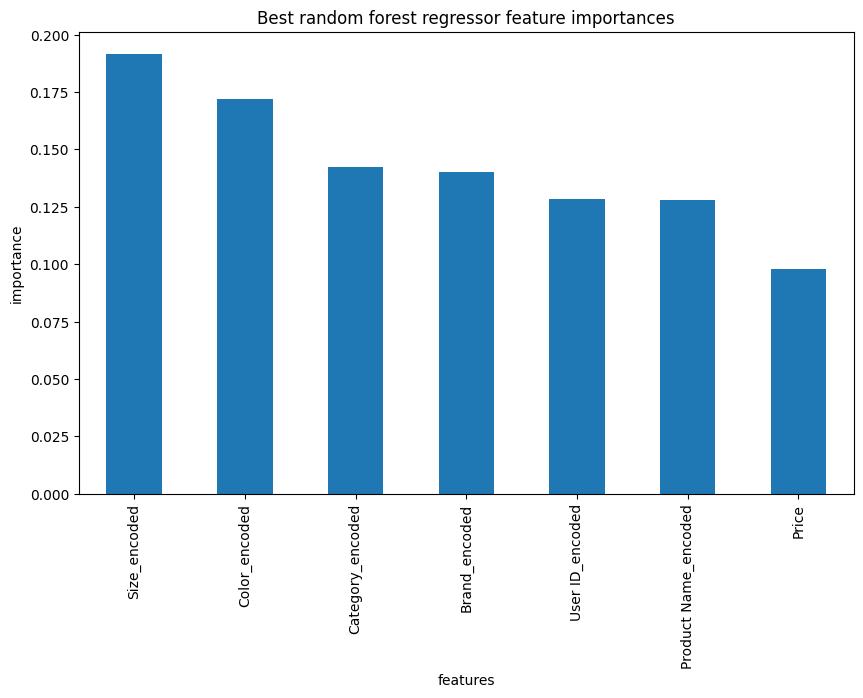

In [33]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Size_encoded            0.191598
Color_encoded           0.171933
Category_encoded        0.142257
Brand_encoded           0.140161
User ID_encoded         0.128346
Product Name_encoded    0.127769
Price                   0.097935
dtype: float64


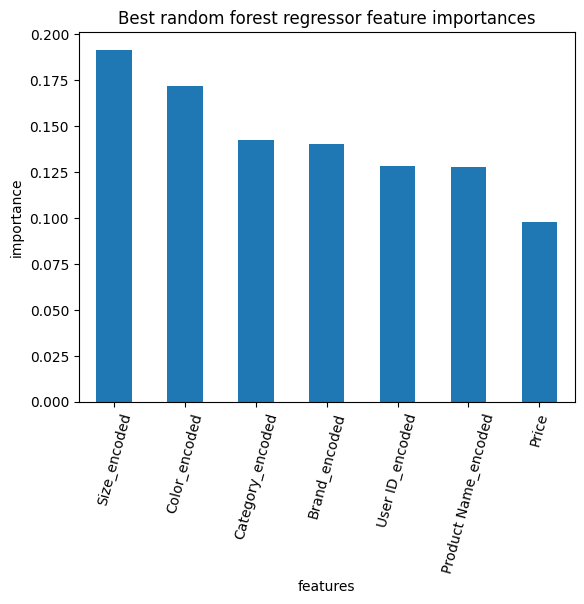

In [34]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xticks(rotation=75)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

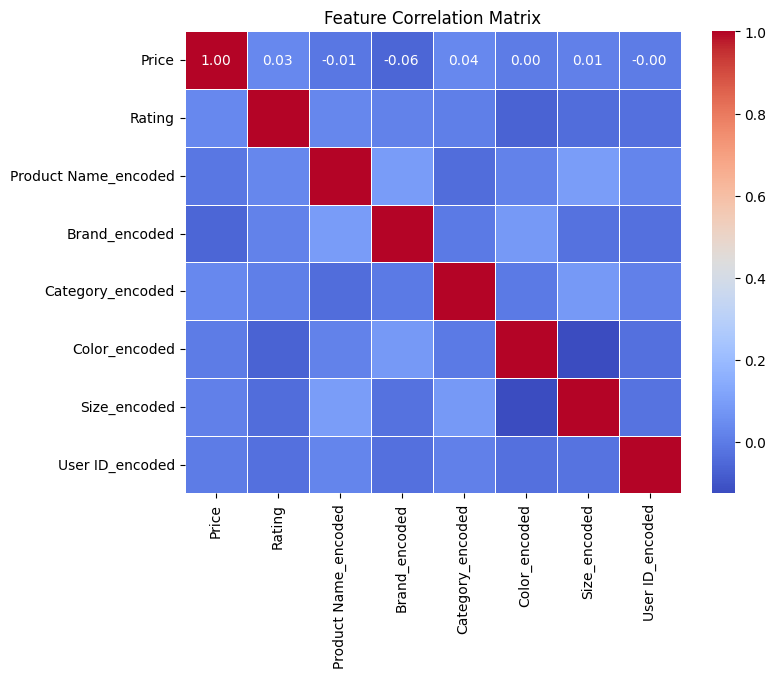

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [36]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[3.08140161 3.06861002 2.76354643 2.74971369 2.92868329 3.00395671
 3.23226531 3.02947403 3.02789354 3.12729512 3.00160873 3.04566636
 3.16639864 2.71218828 3.09599704 2.91805872 2.65957946 3.00712923
 3.05246608 3.16027782 2.52602286 3.02179605 2.97616873 3.14982569
 3.14927012 3.03663825 2.74420782 3.01555918 2.97372529 2.70804992
 2.97380799 3.04590678 3.17879984 3.05772757 3.20331478 2.81195501
 3.04969023 2.61643413 3.08385351 3.05755763 2.81646634 2.94638581
 2.91753031 3.14306457 2.99066933 3.16219055 2.94473161 3.34016106
 2.49423721 2.91273641 3.00044096 3.00909551 3.10468227 2.94222223
 2.61904394 3.14217256 2.87422958 3.08514704 2.94325776 3.24273916
 3.29145923 3.03013383 3.11634086 3.04306621 3.14526147 3.16915696
 3.123396   3.08184509 3.01585066 2.74609423 2.65457822 3.27829034
 2.99108482 3.10177743 3.39244894 2.93526808 2.95153509 3.12286825
 2.96089894 2.49164432 2.49593977 2.96514567 3.10334056 3.14312518
 2.67070285 3.00551198 3.17148599 3.04643937 3.15839672 3.0700

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.26
Mean Absolute Error: 0.96
RMSE: 1.1238751183602806
R-squared: 0.02


This is an issue, R square still not significant.

In [38]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  2.2616327943758563e-05


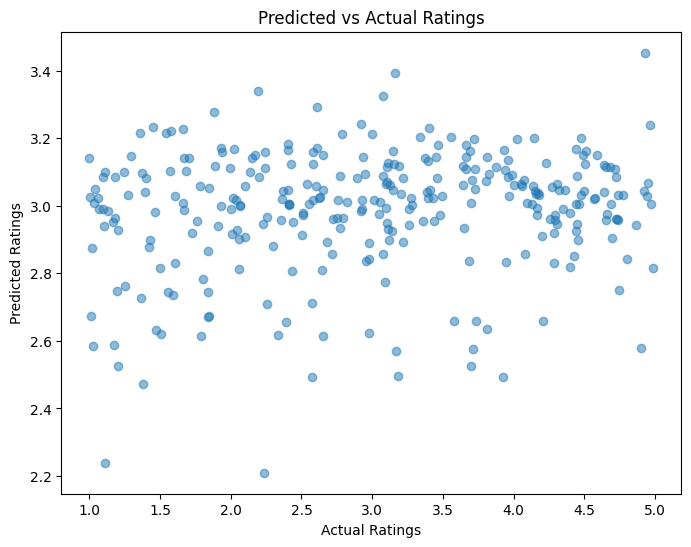

In [39]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Analyzing Predicted Ratings Distribution

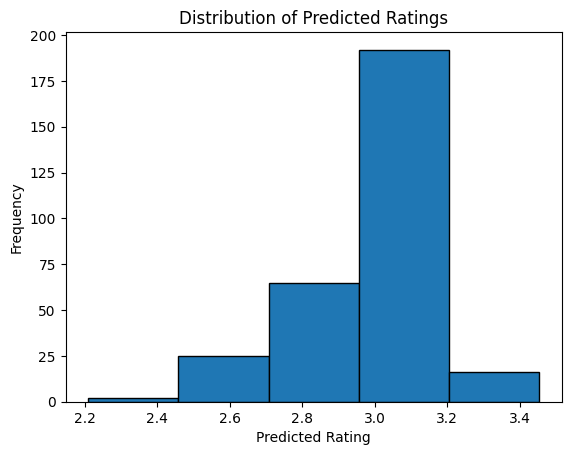

In [40]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [42]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 1.0329790178006157
R-squared: -0.16502047027998668
RMSE: 1.227535085843371
Mean Squared Error: 1.506842386976492


In [43]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -0.1929490431976577


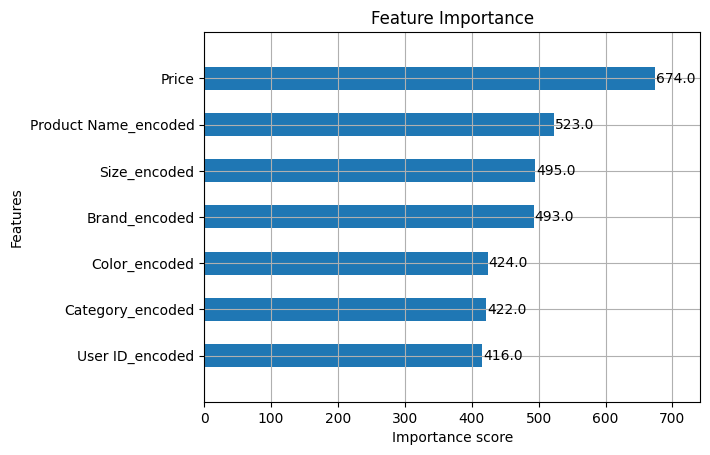

In [44]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Hyperparameter search using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100, 'subsample': 0.9}
Best Score (Negative MSE): -1.3604735212026038


# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [46]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df.drop(columns=['Rating'])
y = df['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate,   # Loss function for regression,  # Specify which features are categorical
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=False             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

array([2.37168022, 2.993138  , 2.48112511, 2.78079818, 2.86218891,
       2.88810287, 3.23165111, 2.64199968, 3.17153714, 3.10103874,
       3.13576469, 3.07149751, 2.95768237, 2.99829986, 3.07637331,
       2.87180567, 3.54787058, 2.74008569, 2.91352537, 3.34571623,
       2.49206342, 3.09539734, 2.94552616, 2.82905337, 2.64933845,
       3.10185735, 3.10584721, 2.79162604, 3.38022725, 2.98859502,
       3.22925738, 2.6371655 , 2.50964264, 2.82885241, 2.89760411,
       2.82918265, 3.0988609 , 2.52063324, 3.09779657, 3.46659478,
       2.97894855, 3.25204528, 2.82312029, 2.57754704, 2.63022121,
       3.1211588 , 3.39294548, 3.22189733, 2.60287435, 2.90950714,
       2.86996267, 3.08280054, 3.37946937, 2.80206296, 3.54810418,
       2.97378403, 3.24527552, 2.88873356, 3.0889327 , 2.68691523,
       2.87709957, 2.89448717, 2.69984134, 2.78814849, 2.89684889,
       3.28993102, 3.39897476, 3.06574351, 3.34774427, 2.94996779,
       3.00371771, 2.63582131, 2.60452793, 3.29709266, 3.25630

In [47]:
print(df.columns.tolist())

['User ID', 'Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Color', 'Size']


In [48]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.4909523425892044


In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.04836836008756107


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [50]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse = mean_squared_error(y_test, y_pred_cat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (MAE): 1.0615611138272387
R-squared: -0.052146605745354346
RMSE: 1.2210455939845999
Mean Squared Error: 1.4909523425892044


In [51]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -0.07736929834883899


In [52]:
# Get feature importance
feature_importance = model_cat.get_feature_importance()

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


        Feature  Importance
5         Color   18.399562
1  Product Name   16.923244
3      Category   15.257306
2         Brand   14.312512
0       User ID   14.266673
6          Size   13.436505
4         Price    7.404198


# Visualize Feature Importance

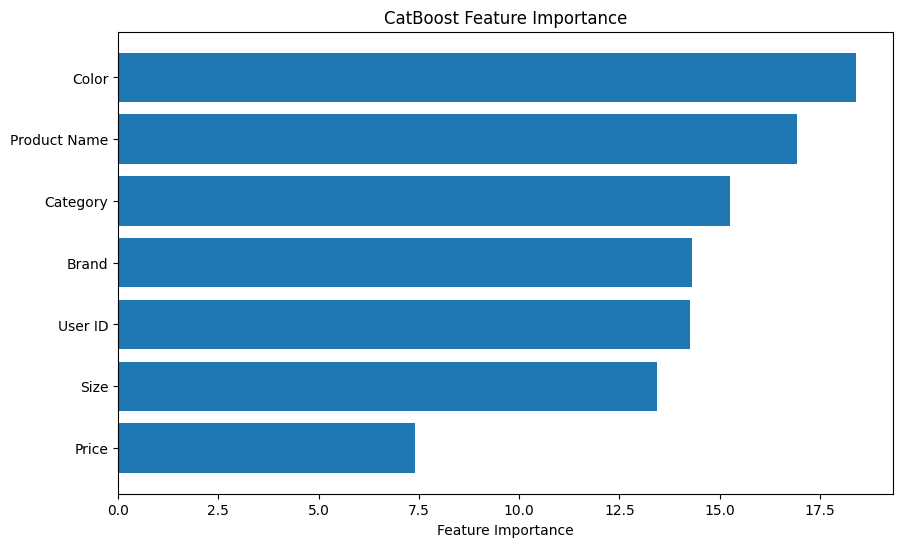

In [53]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Hyperparameter search using GridSearchCV

In [54]:
# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'od_wait': [300],
}

# Grid search
grid_search_cat = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False)
grid_search_cat.fit(X_train, y_train)

# Get the best parameters and best score (RMSE)
best_params = grid_search_cat.best_params_
best_rmse = -grid_search_cat.best_score_  # Negate because scoring is negative RMSE
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Best Hyperparameters: {'bagging_temperature': 0.0, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01, 'od_wait': 300}
Best RMSE: 0.02003061763462246


In [55]:
# Make predictions
y_pred_cat_grid = grid_search_cat.predict(X_test)

y_pred_cat_grid

array([2.82197897, 3.01197375, 3.03015417, 2.97130057, 2.9754019 ,
       3.00601856, 3.08077349, 2.91164855, 3.04424187, 3.10915863,
       3.10760371, 3.08320577, 3.07145147, 3.00810865, 3.06276136,
       3.07255127, 3.16540429, 3.03756778, 2.98906776, 3.11068451,
       2.92812933, 3.05573281, 2.997873  , 2.95215114, 2.99178781,
       3.03722771, 3.0643511 , 3.05464722, 3.05801319, 3.02156723,
       3.1268761 , 2.96079722, 2.90507345, 2.95110983, 2.99369901,
       2.92618577, 3.06218893, 2.95598545, 2.98852608, 3.08736712,
       3.02930583, 3.00294488, 3.01296021, 2.89743959, 2.88332296,
       3.01281363, 3.08523824, 2.95691228, 2.96959453, 3.0482154 ,
       2.90841044, 2.98753318, 3.12329743, 3.03753527, 3.09900648,
       3.05901315, 3.02245753, 2.98819461, 2.97060804, 3.07038609,
       3.01659137, 3.07387968, 2.97385398, 3.01532146, 2.9914945 ,
       2.99105255, 2.9773858 , 2.99439953, 3.06209388, 2.93979424,
       3.01730953, 3.03144854, 2.95274437, 3.03830263, 3.02201

Best RMSE: 0.02

For a rating prediction model where your target is between 1 and 5

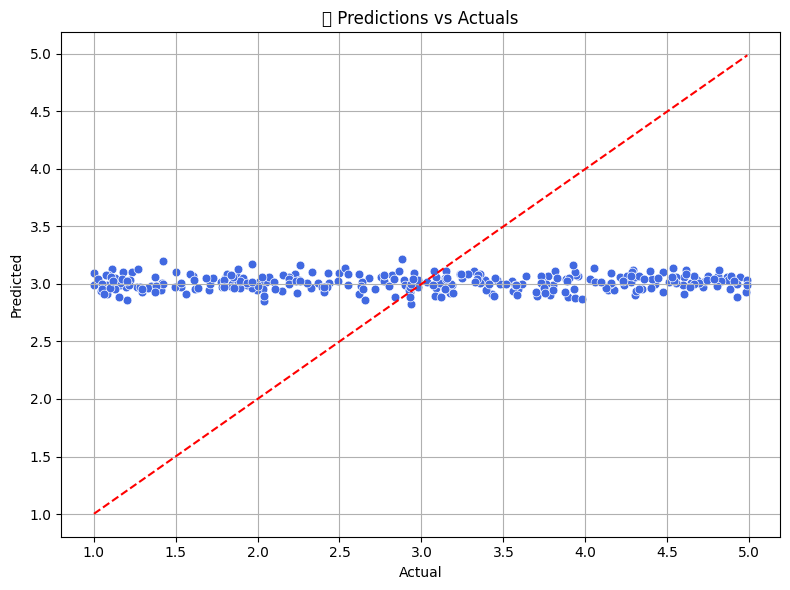

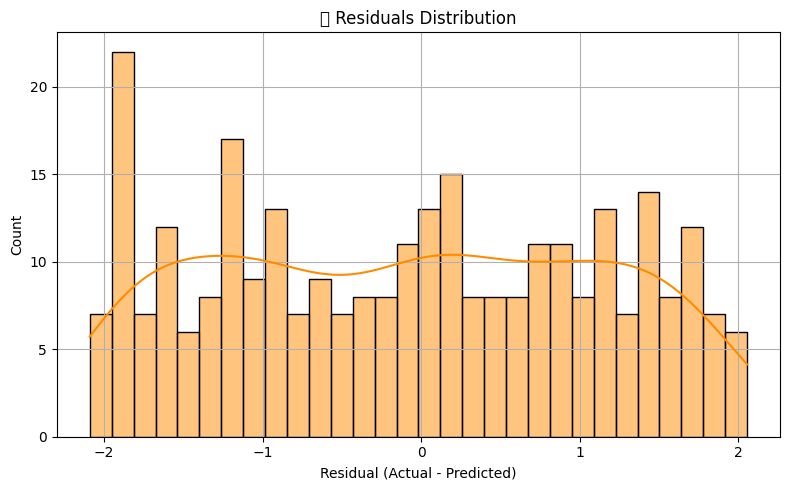

In [56]:
# === 1. Predictions vs Actuals ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_cat_grid, color='royalblue', s=40)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("📈 Predictions vs Actuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Residuals Plot ===
residuals = y_test - y_pred_cat_grid
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='darkorange')
plt.title("🧮 Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Method 4 - Singular Value Decomposition (SVD)

Here we are using SVD (Singular Value Decomposition) for collaborative filtering-based recommendation, that specifically shows how the User will rate a particular Product.

In [97]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df.pivot(index='User ID', columns='Product ID', values= "Rating")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Product ID  1     2     3     4     5     6     7     8     9     10    ...  \
User ID                                                                 ...   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Product ID  991   992   993   994   995   996   997   998   999   1000  
User ID                                                                 
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       

# Collaborative Filtering Using Matrix Factorization (SVD)

Using Collaborative Filtering that uses user-item interactions (e.g., user ratings for products) to predict how a user might rate an item.

In [98]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1

user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1

recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['User ID', 'Product ID', 'Rating']])

Top 5 Recommended Products:
     User ID  Product ID    Rating
21        56          22  4.568632
176       56         177  4.567658
422       56         423  4.502435
990       60         991  4.972677
44        60          45  4.886711


# Content-based Filtering

In [99]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df[df['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df[df['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
243         244     85  3.474622
481         482     97  3.578219
573         574     92  4.491894
628         629     95  3.579320
635         636     96  4.602211


In [100]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
21           22     89  4.568632
176         177     12  4.567658
422         423     83  4.502435
990         991     25  4.972677
44           45     85  4.886711
166         167     43  4.478061
601         602     11  4.342864
667         668     11  1.842279
731         732     28  2.645059
907         908     36  3.194487


In [101]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.26679103813840327


The RMSE value of 0.266 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [102]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [103]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [104]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [105]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [106]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [107]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [108]:
df_seg = df_seg.drop(columns = ["Price"])

In [109]:
df_seg.head()

,User ID,Product ID,Product Name,Brand,Category,Rating,Color,Size,metadata,total_purchase_amount,spending_segment
0,19,1,Dress,Adidas,Men's Fashion,1.043159,Black,XL,Dress Adidas Men's Fashion Black XL,40,Low Spending
1,97,2,Shoes,H&M,Women's Fashion,4.026416,Black,L,Shoes H&M Women's Fashion Black L,82,High Spending
2,25,3,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,Dress Adidas Women's Fashion Yellow XL,44,Low Spending
3,57,4,Shoes,Zara,Men's Fashion,1.049523,White,S,Shoes Zara Men's Fashion White S,23,Low Spending
4,79,5,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,T-shirt Adidas Men's Fashion Black M,79,High Spending


# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [110]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

Average Ratings by Spending Segment:
spending_segment
High Spending    3.035180
Low Spending     2.970891
Name: Rating, dtype: float64


There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

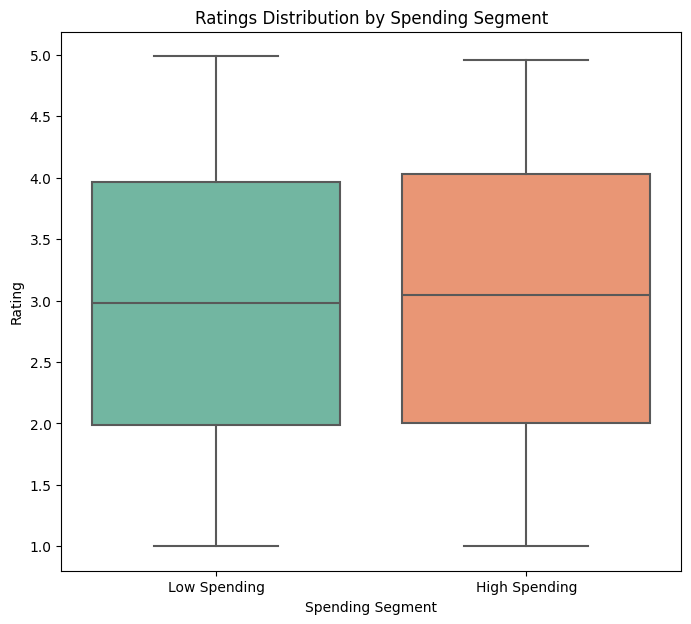

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

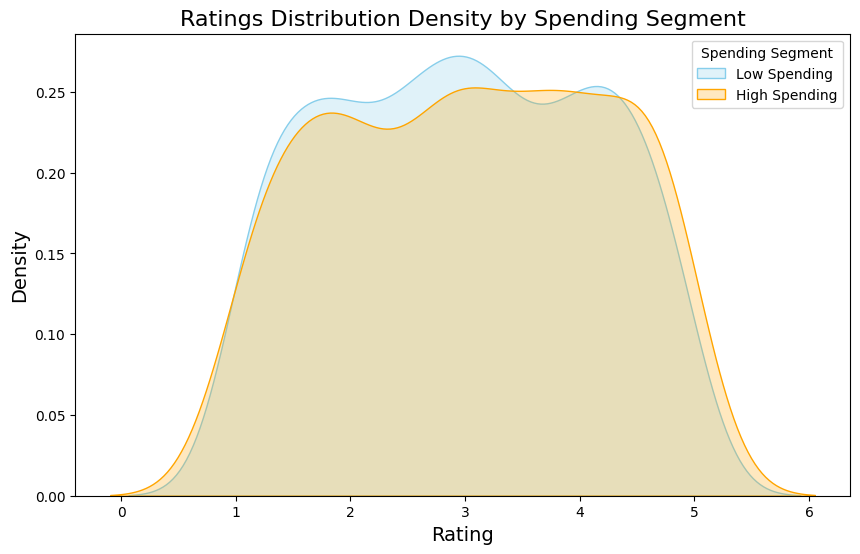

In [112]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


# Save best model object

In [113]:
# save the model
import pickle

# save the best model as a pickle file
model_pkl_file = "best_model_cat.pkl"  

with open(model_pkl_file, 'wb') as file:
    pickle.dump(best_model, file)

In [114]:
# Now load it
with open("best_model_cat.pkl", "rb") as f:
    model = pickle.load(f)

In [115]:
import os

print("Current directory:", os.getcwd())
print("Files:", os.listdir())

Current directory: /Users/swatisharma/Documents/GitHub/Capstone_3
Files: ['fashion_products.csv', 'Recommendation System for Fashion Product.pdf', 'streamlit', '.DS_Store', 'datawrangling_EDA_datasciencecapstone3.ipynb', 'pre-processing_Modeling_OneHotEncoding.ipynb', 'datawrangling_EDA_datasciencecapstone3-Copy1.ipynb', 'pre-processing_Modeling-Copy2.ipynb', 'Recommendation system for Fashion Products.pdf', 'Recommendation system for Fashion Products.key', 'Project Report Recommendation for Fashion Product.pdf', 'Capstone3_Presentation_v0 copy.pdf', 'fashion_recommender_app_xgboost', 'best_model_cat.pkl', 'model_xgBoost.pkl', 'final pre-processing_Modeling_CatBoostEncoder-Copy1.ipynb', 'pre-processing_Modeling.ipynb', 'pkl_pre-processing_Modeling_CatBoostEncoder-Copy1.ipynb', '.ipynb_checkpoints', 'best_catboost_model.pkl', 'pre-processing_Modeling-Copy1.ipynb', 'pre-processing_Modeling_OrdinalEncoder.ipynb', 'pre-processing_Modeling_CatBoostEncoder.ipynb', 'df_features.csv', 'catboos

# Summary:

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating).

In [118]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load your dataset
df = pd.read_csv("fashion_products.csv")

# Clean and format for SVD
svd_df = df[["User ID", "Product ID", "Rating"]].copy()
svd_df.columns = ["user", "item", "rating"]

# Set the rating scale based on your data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(svd_df[["user", "item", "rating"]], reader)

# Initialize SVD model
model = SVD()

# Cross-validate
results = cross_validate(model, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

# Print average scores
print("Average RMSE:", round(results['test_rmse'].mean(), 4))
print("Average MAE:", round(results['test_mae'].mean(), 4))


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2033  1.1023  1.1384  1.1666  1.2115  1.1644  0.0407  
MAE (testset)     1.0296  0.9480  0.9465  1.0050  1.0714  1.0001  0.0481  
Fit time          0.01    0.02    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Average RMSE: 1.1644
Average MAE: 1.0001


In [119]:
pred = model.predict(uid=25, iid=10)
print(f"Predicted rating: {pred.est:.2f}")

Predicted rating: 3.51


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a combined text feature for each product
df['metadata'] = df[['Product Name', 'Brand', 'Category', 'Color', 'Size']].fillna('').agg(' '.join, axis=1)

# Vectorize the combined metadata using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['metadata'])

# Compute cosine similarity between all products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping from product ID to DataFrame index
product_id_to_index = pd.Series(df.index, index=df['Product ID'])

# Show shape of the similarity matrix and sample similarity scores
cosine_sim.shape, cosine_sim[:2, :5]


((1000, 1000),
 array([[1.        , 0.35544216, 0.62850886, 0.18919296, 0.67858152],
        [0.35544216, 1.        , 0.21382974, 0.3219269 , 0.39430987]]))

In [121]:
# Function to get top N similar products based on content
def get_similar_products(product_id, top_n=5):
    if product_id not in product_id_to_index:
        return f"❌ Product ID {product_id} not found."

    # Get index of the product
    idx = product_id_to_index[product_id]

    # Get similarity scores for this product with all others
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (descending) and skip the product itself (first one)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the most similar products
    return df.iloc[product_indices][["Product ID", "Product Name", "Brand", "Category", "Color", "Size"]]

# Example: Get similar products to Product ID 25
get_similar_products(25)


,Product ID,Product Name,Brand,Category,Color,Size
124,125,Sweater,H&M,Kids' Fashion,Green,L
996,997,Sweater,Nike,Kids' Fashion,Green,L
493,494,Sweater,Zara,Kids' Fashion,Green,M
500,501,Sweater,Adidas,Kids' Fashion,Green,S
909,910,Sweater,Adidas,Kids' Fashion,Green,S


In [122]:
# Function to get top N similar products based on content
def get_similar_products(product_id, top_n=5):
    if product_id not in product_id_to_index:
        return f"❌ Product ID {product_id} not found."

    # Get index of the product
    idx = product_id_to_index[product_id]

    # Get similarity scores for this product with all others
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (descending) and skip the product itself (first one)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the most similar products
    return df.iloc[product_indices][["Product ID", "Product Name", "Brand", "Category", "Color", "Size"]]

# Example: Get similar products to Product ID 25
get_similar_products(10)


,Product ID,Product Name,Brand,Category,Color,Size
884,885,T-shirt,Zara,Kids' Fashion,White,XL
252,253,T-shirt,Zara,Kids' Fashion,White,M
630,631,T-shirt,Zara,Kids' Fashion,White,S
946,947,T-shirt,Zara,Kids' Fashion,White,S
285,286,T-shirt,H&M,Kids' Fashion,White,XL


This means if a user liked Product 25, you can recommend any of these as similar items!